In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:


In [2]:
import pandas as pd
import os
import xlrd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, fftfreq
from collections import Counter
import librosa
import librosa.display
import json
import cv2

In [ ]:
data_table = pd.read_excel("goldStandarts_2020_united.xlsx")
print(data_table)

     E:\Recordings\Young\2015\08150G_WT\02714P_HT\day_6\session1\  ...       Chevron
0     E:\Recordings\Young\2015\08150G_WT\02714P_HT\d...            ...  Two-Syllable
1     E:\Recordings\Young\2015\08150G_WT\02714P_HT\d...            ...         Short
2     E:\Recordings\Young\2015\08150G_WT\02714P_HT\d...            ...         Short
3     E:\Recordings\Young\2015\08150G_WT\02714P_HT\d...            ...       Chevron
4     E:\Recordings\Young\2015\08150G_WT\02714P_HT\d...            ...       Chevron
...                                                 ...            ...           ...
5885  E:/Recordings/Adult/2017/Batch 5 Post-Choline ...            ...       Chevron
5886  E:/Recordings/Adult/2017/Batch 5 Post-Choline ...            ...        Upward
5887  E:/Recordings/Adult/2017/Batch 5 Post-Choline ...            ...       Chevron
5888  E:/Recordings/Adult/2017/Batch 5 Post-Choline ...            ...       Chevron
5889  E:/Recordings/Adult/2017/Batch 5 Post-Choline ...          

In [3]:
#data_table = pd.read_excel("gold_standart_test.xlsx")
#print(data_table)
#mother = data_table.iloc[0:7,2]
#print(mother)


data_table = xlrd.open_workbook('goldStandarts_2020_united.xlsx').sheet_by_index(0)
all_path = data_table.col_values(0, 0)
#mother = data_table.col_values(2, 1)
#name = data_table.col_values(4, 1)
syllable = data_table.col_values(8, 0)
rec_name = data_table.col_values(1, 0)
start = data_table.col_values(2, 0)
finish = data_table.col_values(3, 0)



In [4]:
for i in range(len(all_path)):
  all_path[i] = all_path[i].replace("\\", "/")

In [5]:
time_diff = []
start_arr = np.array(start) #converting to array
finish_arr = np.array(finish)
time_diff = np.subtract(finish_arr, start_arr) #calculating each syllable length
#max_time = max(time_diff) #finding maximum syllable length
max_time = 0.25
print(max_time)
#print(np.where(time_diff == 1.0896))

0.25


([], <a list of 0 Text major ticklabel objects>)

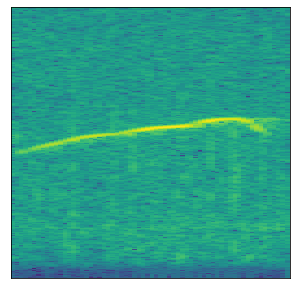

In [61]:
sr=250000
i = 5707
path = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/{}/{}.WAV'.format(all_path[i], rec_name[i]) #find path of each recording
#path = path.replace("\\", "/")
rec, rate = librosa.load(path, sr)
temp = (max_time - time_diff[i])/2
trimmed = rec[round((start[i])*rate):round((finish[i])*rate)]
silence = np.zeros(round((temp)*rate))
syl=trimmed
#silence = np.mean(trimmed)*np.ones(round((temp-0.015)*rate))
#syl = np.append(silence, trimmed)
#syl = np.append(syl, silence)
D1 = librosa.stft(syl, n_fft=2048, hop_length=128, win_length=512, window='hamming')
D = np.abs(D1)
#D = cv2.resize(D, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#D = D - 0.05*np.mean(D)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.pcolormesh(20*np.log10(D))
plt.xticks([])
plt.yticks([])
#######
#D1D = D.ravel()
#MCV = np.mean(D1D)
#count = Counter(D1D)
#MCV = count.most_common()
#silence_stft = MCV*np.ones(shape=np.shape(D))
#silence = librosa.core.istft(silence_stft, hop_length=128, win_length=512, window='hamming')
#silence = np.append(silence, silence)
#silence = silence[0:round(temp*rate)]
#syl = np.append(silence, trimmed)
#syl = np.append(syl, silence)
#D1 = librosa.stft(syl, n_fft=2048, hop_length=128, win_length=512, window='hamming')
#D = np.abs(D1)
#D = cv2.resize(D, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#D = D - 0.01*np.mean(D)
#D1 = D1 - 3*np.mean(D1)
#iD = librosa.core.istft(D, hop_length=128, win_length=512, window='hamming')
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
#ax.pcolormesh(20*np.log10(D))

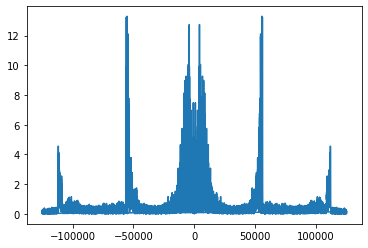

In [ ]:
#syl = iD
N = len(trimmed)

yf = fft(trimmed)
xf = fftfreq(N, 1 / sr)

plt.plot(xf, np.abs(yf))
plt.show()

In [ ]:
from scipy.io.wavfile import write
#path_silence = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/Recordings_ella_ayelet/total_data/8001P/8136G/T0000046.WAV'
sr=250000
#rec_silence, sr = librosa.load(path_silence, sr=sr)
#rec_silence = rec_silence[0:round((0.13)*sr)]

%cd /content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/E:/Data_United_Syllables_new/
for i in range(len(all_path)):
  path = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/{}/{}.wav'.format(all_path[i], rec_name[i]) #find path of each recording
  path = path.replace("\\", "/")
  if not os.path.exists('{}'.format(path)):
    path = '/content/drive/Shareddrives/TEST_RECORDINGS/Final_Project/{}/{}.WAV'.format(all_path[i], rec_name[i])
    if not os.path.exists('{}'.format(path)):
      continue
  if time_diff[i] >= max_time:
    continue
  rec, rate = librosa.load(path, sr) #opens recordings and sample rate, add sample rate of USVs
  temp = (max_time - time_diff[i])/2
  silence = np.zeros(round((temp)*rate))
  trimmed = rec[round((start[i])*rate):round((finish[i])*rate)] #trimming the syllables according to start and fin poitns from excel
  syl = np.append(silence, trimmed) #normalizing length to max syllable
  syl = np.append(syl, silence)
  write('syllable{}'.format(i), rate, syl) #saving syllabels as wav files


/content/drive/.shortcut-targets-by-id/1lClKCRILD0AwA0p_iwcizl4ernv3OMRC/Final_Project/E:/Data_United_Syllables_new


In [ ]:
temp = (max_time - time_diff[i])/2
trimmed = rec[round((start[i])*rate):round((finish[i])*rate)]
silence = np.zeros(temp*rate)

In [ ]:
print(max_time)

0.25
